In [1]:
import os

from common.libs.data_analysis.SeriesDescriberWRTTarget import *
from common.libs.DataDisplayer import *
import tensorflow as tf
import random
import tensorflow.keras.layers as layers
import math
from common.classes.CustomCallbacks import BatchMetricsCallbackVal

SEED = 42

tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

tf.config.experimental.enable_op_determinism()

In [2]:
TRAIN_FILE = os.path.join(os.getcwd(),
                          "inputs",
                          "model_ready",
                          "train",
                          "0.csv")

TEST_FILE = os.path.join(os.getcwd(),
                         "inputs",
                         "model_ready",
                         "test",
                         "0.csv")
train_df = pd.read_csv(TRAIN_FILE)
test_df = pd.read_csv(TEST_FILE)

xs = train_df.drop(columns=["date",
                            "store_nbr",
                            "city",
                            "state",
                            "cluster",
                            *[f"type_{chr(i)}" for i in range(ord('A'), ord('E') + 1)]],
                   axis=1)

uppercase_cols = [col for col in train_df.columns if col.isupper()]
ys = train_df[uppercase_cols]

print(xs.shape, ys.shape)
display_table(xs.head())
display_table(ys.head())

(1684, 39) (1684, 33)


,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,EGGS,FROZEN FOODS,GROCERY I,GROCERY II,HARDWARE,HOME AND KITCHEN I,HOME AND KITCHEN II,HOME APPLIANCES,HOME CARE,LADIESWEAR,LAWN AND GARDEN,LINGERIE,"LIQUOR,WINE,BEER",MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,dcoilwtico,vacation holiday,vacation additional,vacation bridge,vacation work day,vacation event
0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,93.076667,1,0,0,0,0
1,2.0,0.0,2.0,1091.0,0.0,470.652,0.0,1060.0,579.0,164.069,246.0,131.000,2652.0,31.0,3.0,0.0,0.0,0.0,0.0,0.0,10.0,13.0,67.0,0.0,369.101,194.0,0.0,0.0,247.29700,47.0,0.0,0.0,38.029000,93.140000,0,0,0,0,0
2,3.0,0.0,0.0,919.0,0.0,310.655,0.0,836.0,453.0,151.582,203.0,87.044,2121.0,12.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,15.0,66.0,0.0,272.319,153.0,0.0,0.0,187.27800,63.0,0.0,0.0,17.366001,92.970000,0,0,0,0,0
3,3.0,0.0,3.0,953.0,0.0,198.366,0.0,827.0,460.0,131.411,171.0,65.000,2056.0,15.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0,102.0,0.0,454.172,88.0,0.0,0.0,258.02300,67.0,0.0,0.0,29.907001,93.120000,0,0,0,0,0
4,5.0,0.0,3.0,1160.0,0.0,301.057,0.0,811.0,464.0,118.613,177.0,70.000,2216.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,159.0,0.0,328.940,141.0,0.0,0.0,212.33301,66.0,0.0,0.0,24.842000,93.113810,0,0,0,1,0


,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,EGGS,FROZEN FOODS,GROCERY I,GROCERY II,HARDWARE,HOME AND KITCHEN I,HOME AND KITCHEN II,HOME APPLIANCES,HOME CARE,LADIESWEAR,LAWN AND GARDEN,LINGERIE,"LIQUOR,WINE,BEER",MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
1,2.0,0.0,2.0,1091.0,0.0,470.652,0.0,1060.0,579.0,164.069,246.0,131.000,2652.0,31.0,3.0,0.0,0.0,0.0,0.0,0.0,10.0,13.0,67.0,0.0,369.101,194.0,0.0,0.0,247.29700,47.0,0.0,0.0,38.029000
2,3.0,0.0,0.0,919.0,0.0,310.655,0.0,836.0,453.0,151.582,203.0,87.044,2121.0,12.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,15.0,66.0,0.0,272.319,153.0,0.0,0.0,187.27800,63.0,0.0,0.0,17.366001
3,3.0,0.0,3.0,953.0,0.0,198.366,0.0,827.0,460.0,131.411,171.0,65.000,2056.0,15.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0,102.0,0.0,454.172,88.0,0.0,0.0,258.02300,67.0,0.0,0.0,29.907001
4,5.0,0.0,3.0,1160.0,0.0,301.057,0.0,811.0,464.0,118.613,177.0,70.000,2216.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,159.0,0.0,328.940,141.0,0.0,0.0,212.33301,66.0,0.0,0.0,24.842000


In [3]:
# Consts
NUM_UNROLLINGS = 50
BATCH_SIZE = 200
DROPOUT = 0.2
EPOCHS = 250

VALIDATION_SPLIT = 0.2
SPLIT_LOC = math.floor(xs.shape[0] * VALIDATION_SPLIT)


In [4]:
from common.classes.DataGenerators import SeqDataGeneratorXY

tf.compat.v1.reset_default_graph()

xs_np_all = xs.to_numpy()
ys_np_all = ys.to_numpy()

xs_np = xs_np_all[:SPLIT_LOC]
ys_np = ys_np_all[:SPLIT_LOC]

val_xs = xs_np_all[SPLIT_LOC:]
val_ys = ys_np_all[SPLIT_LOC:]

print(xs_np_all.shape, ys_np_all.shape)
print(xs_np.shape, ys_np.shape)
print(val_xs.shape, val_ys.shape)



(1684, 39) (1684, 33)
(336, 39) (336, 33)
(1348, 39) (1348, 33)


In [5]:
tmp_train = SeqDataGeneratorXY(xs_np, ys_np, BATCH_SIZE, NUM_UNROLLINGS, seed=SEED)
tmp_val = SeqDataGeneratorXY(val_xs, val_ys, BATCH_SIZE, NUM_UNROLLINGS, seed=SEED)
tmp_train_inputs, tmp_train_outputs = tmp_train.unroll_batches()
tmp_val_inputs, tmp_val_outputs = tmp_val.unroll_batches()

train_inputs_shape = tmp_train_inputs.shape
train_outputs_shape = tmp_train_outputs.shape
val_inputs_shape = tmp_val_inputs.shape
val_outputs_shape = tmp_val_outputs.shape


In [6]:
# Create generators
def create_generators():
    dg_train = SeqDataGeneratorXY(xs_np, ys_np, BATCH_SIZE, NUM_UNROLLINGS, seed=SEED)
    df_val = SeqDataGeneratorXY(val_xs, val_ys, BATCH_SIZE, NUM_UNROLLINGS, seed=SEED)

    train_dataset = tf.data.Dataset.from_generator(
            dg_train.as_generator(),
            output_signature=(
                tf.TensorSpec(shape=train_inputs_shape, dtype=tf.float32),
                tf.TensorSpec(shape=train_outputs_shape, dtype=tf.float32)
            )
    ).prefetch(tf.data.AUTOTUNE)
    val_dataset = tf.data.Dataset.from_generator(
            df_val.as_generator(),
            output_signature=(
                tf.TensorSpec(shape=val_inputs_shape, dtype=tf.float32),
                tf.TensorSpec(shape=val_outputs_shape, dtype=tf.float32)
            )
    ).prefetch(tf.data.AUTOTUNE)
    return train_dataset, val_dataset

In [7]:
def create_model(lstm_nodes=(100, 150, 100), dense_after=(50,)):
    n_layers_dense_after = len(dense_after)
    n_layers_lstm = len(lstm_nodes)

    model_layers = [
        layers.Input(shape=(train_inputs_shape[1], train_inputs_shape[2])),
        *[layers.LSTM(
                lstm_nodes[layer],
                return_sequences=True
        ) for layer in range(n_layers_lstm)],
        *[layers.TimeDistributed(
                layers.Dense(
                        dense_after[layer],
                        activation="relu"
                )
        ) for layer in range(n_layers_dense_after)],
        layers.TimeDistributed(
                layers.Dense(train_outputs_shape[2])
        ),
    ]

    created_model = tf.keras.Sequential(model_layers)

    created_model.compile(
            optimizer='adam',
            loss=tf.keras.losses.MeanSquaredLogarithmicError,
    )
    return created_model

Epoch 1/250
1/1 - 4s - 4s/step - loss: 12.3175 - val_loss: 15.8299
Epoch 2/250
1/1 - 1s - 617ms/step - loss: 11.4111 - val_loss: 15.1850
Epoch 3/250
1/1 - 1s - 608ms/step - loss: 10.7650 - val_loss: 14.8719
Epoch 4/250
1/1 - 1s - 564ms/step - loss: 10.2269 - val_loss: 14.4471
Epoch 5/250
1/1 - 1s - 593ms/step - loss: 9.8015 - val_loss: 13.9187
Epoch 6/250
1/1 - 1s - 606ms/step - loss: 9.4860 - val_loss: 13.4516
Epoch 7/250
1/1 - 1s - 562ms/step - loss: 9.2213 - val_loss: 13.0644
Epoch 8/250
1/1 - 1s - 566ms/step - loss: 8.9604 - val_loss: 12.4963
Epoch 9/250
1/1 - 1s - 632ms/step - loss: 8.6997 - val_loss: 12.2090
Epoch 10/250
1/1 - 1s - 624ms/step - loss: 8.4578 - val_loss: 11.8263
Epoch 11/250
1/1 - 1s - 557ms/step - loss: 8.2659 - val_loss: 11.8306
Epoch 12/250
1/1 - 1s - 572ms/step - loss: 8.0803 - val_loss: 11.3829
Epoch 13/250
1/1 - 1s - 563ms/step - loss: 7.9243 - val_loss: 11.1532
Epoch 14/250
1/1 - 1s - 590ms/step - loss: 7.7895 - val_loss: 11.2924
Epoch 15/250
1/1 - 1s - 603m

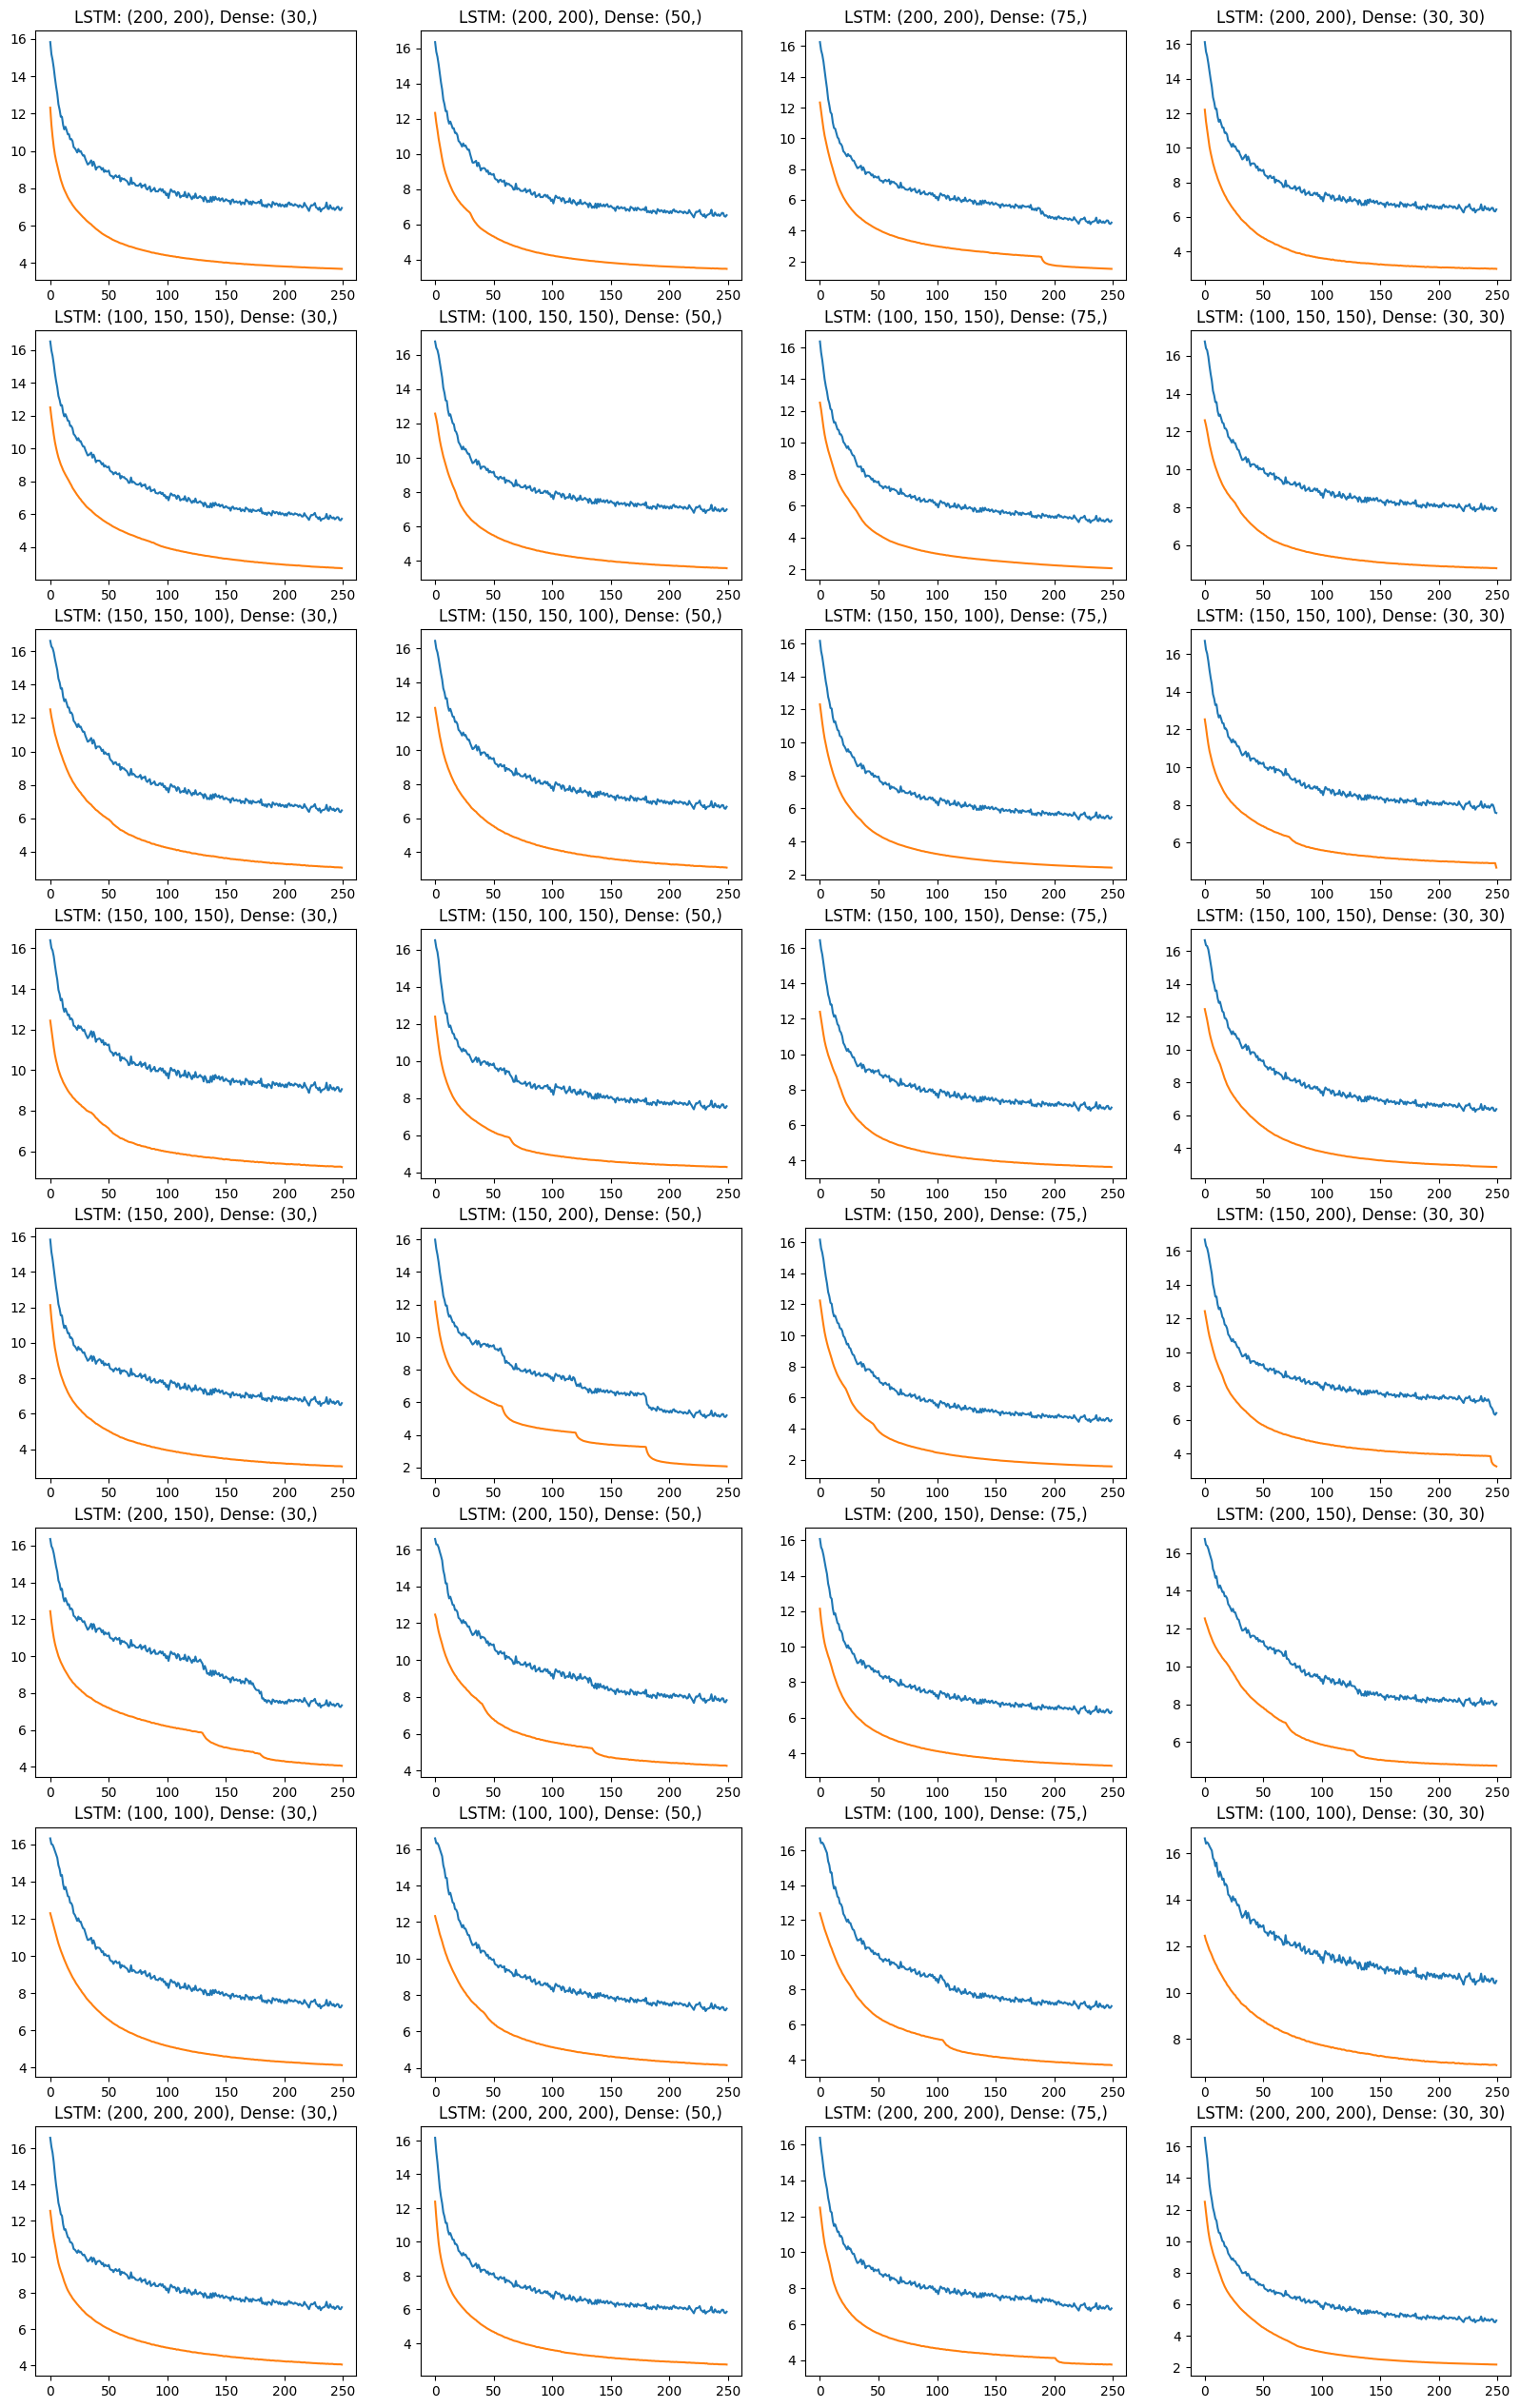

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

LSTM_SHAPES = [
    (200, 200),  #40000
    (100, 150, 150),
    (150, 150, 100),
    (150, 100, 150),
    (150, 200),
    (200, 150),
    (100, 100),
    (200, 200, 200),
]
DENSE_SHAPES = [
    (30,),
    (50,),
    (75,),
    (30, 30),
]
EPOCHS = 250

DIMS_OF_PLOT = (len(LSTM_SHAPES), len(DENSE_SHAPES))  # Y, X
SIZE_OF_PLOT = (4, 5)  # Y, X
fig, ax = plt.subplots(DIMS_OF_PLOT[0],
                       DIMS_OF_PLOT[1],
                       figsize=(DIMS_OF_PLOT[1] * SIZE_OF_PLOT[1], DIMS_OF_PLOT[0] * SIZE_OF_PLOT[0]))

min_error = 100000
min_params = ()

for i, lstm_shape in enumerate(LSTM_SHAPES):
    for j, dense_shape in enumerate(DENSE_SHAPES):
        train_dataset, val_dataset = create_generators()
        model = create_model(lstm_nodes=lstm_shape, dense_after=dense_shape)

        callback = BatchMetricsCallbackVal()
        # early_stopping = EarlyStopping(
        #         monitor='val_loss',
        #         patience=20,
        #         restore_best_weights=True
        # )

        history = model.fit(
                train_dataset,
                validation_data=val_dataset,
                epochs=EPOCHS,
                steps_per_epoch=1,
                validation_steps=1,
                callbacks=[callback],
                verbose=2
                # DO NOT WRITE BATCH_SIZE WHEN RETURNING BATCHES
        )
        output_str = (f"Shape LSTM: {lstm_shape}\n" +
                      f"Dense: {dense_shape}\n" +
                      f"Epochs: {EPOCHS}\n" +
                      f"    Validation loss: {callback.val_losses[-1]}, {len(callback.val_losses)}\n" +
                      f"    Training loss: {callback.batch_losses[-1]}, {len(callback.batch_losses)}\n")

        if callback.val_losses[-1] < min_error:
            min_error = callback.val_losses[-1]
            min_params = (lstm_shape, dense_shape)

        ax[i, j].plot(callback.val_losses)
        ax[i, j].plot(callback.batch_losses)
        ax[i, j].set_title(f"LSTM: {lstm_shape}, Dense: {dense_shape}")

        with open("log.txt", "a") as f:
            f.write(output_str)
            f.write("-----------\n")
        print(output_str)

print(min_error, min_params)
